In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
from scipy.stats import boxcox
from scipy.special import inv_boxcox
from numpy.linalg import inv, pinv
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model, metrics, preprocessing
from sklearn.tree import  DecisionTreeRegressor
from sklearn.metrics import accuracy_score, r2_score
from sklearn import tree
import matplotlib.pyplot as plt

In [2]:
cd "E:\STUDY\ACADEMIC\5th sem\STATS\Group2_BlogFeedback\train"

E:\STUDY\ACADEMIC\5th sem\STATS\Group2_BlogFeedback\train


In [3]:
train_data = pd.read_csv("blogData_train.csv",header=None)
import os

In [4]:
cd "E:\STUDY\ACADEMIC\5th sem\STATS\Group2_BlogFeedback"

E:\STUDY\ACADEMIC\5th sem\STATS\Group2_BlogFeedback


In [5]:
from sklearn.metrics import mean_squared_error
from math import sqrt
import pylab 
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\sai19\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


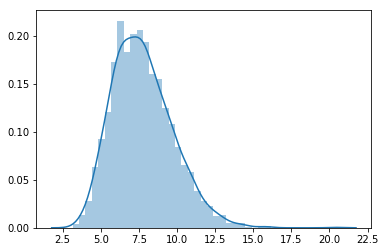

In [6]:
for i in range(len(train_data.iloc[:,-1].values)):
    train_data.iloc[:,-1].values[i] = train_data.iloc[:,-1].values[i]+1
#Central Limit Theorem
mean_array = []
for i in range(2000):
    mean_array.append(train_data.iloc[:,-1].sample(n=350).mean())
sns.distplot(mean_array)

In [7]:
test_data = pd.concat([pd.read_csv('test/' + i, header=None) for i in os.listdir('test') if '.csv' in i], ignore_index=True)

In [8]:
test_data.shape

(15248, 281)

In [9]:
test_data.drop(axis = 0, index = 15247, inplace = True)

In [10]:
#test_data

In [11]:
X_train = train_data

In [12]:
X_train.shape

(52397, 281)

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X = test_data.iloc[:, :-1]
y = test_data.iloc[:, -1]
X_train_1, X_test, y_train_1, y_test = train_test_split(X, y, train_size = 0, random_state=42)

C:\Users\sai19\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [15]:
y_test.shape


(15247,)

In [16]:
y_train = train_data[len(train_data.columns)-1]
X_train.shape

(52397, 281)

In [17]:
del X_train[len(X_train.columns)-1]
X_train.shape

(52397, 280)

In [18]:
from sklearn import linear_model

In [19]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)

In [20]:
predictions = lm.predict(X_test)

In [21]:
lm.score(X_train,y_train)

0.36476032257116975

In [22]:
error = y_test - predictions

In [23]:


rms = sqrt(mean_squared_error(y_test, predictions))


In [24]:
df_lm = pd.DataFrame(data = y_test, columns = ['Original'])

In [25]:
rms

25.465034434702776

In [26]:
from scipy.stats.stats import pearsonr
pearsonr(y_test,predictions)

(0.5565369634165751, 0.0)

In [27]:
df_lm['Original'] = y_test

In [28]:
df_lm.head()

,Original
4097,0.0
8727,2.0
13747,0.0
8518,1.0
1769,0.0


In [29]:
df_lm['Predictions'] = predictions

In [30]:
df_lm['Residuals'] = error

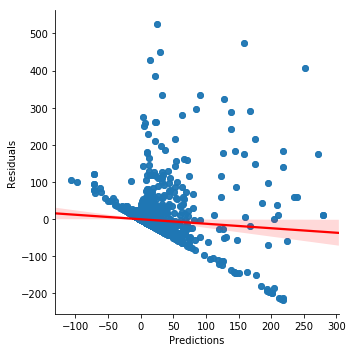

In [31]:
sns.lmplot(x = 'Predictions', y = 'Residuals', data = df_lm, line_kws={'color': 'red'})

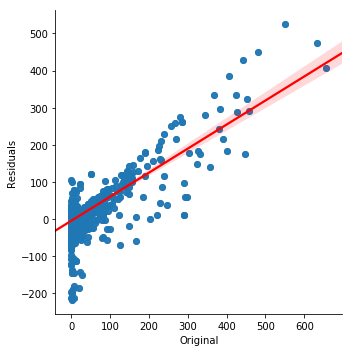

In [32]:
sns.lmplot(x = 'Original', y = 'Residuals', data = df_lm,line_kws={'color': 'red'})

((array([-3.91362615, -3.694069  , -3.57378039, ...,  3.57378039,
          3.694069  ,  3.91362615]),
  array([-217.57729251, -217.57729251, -214.5019185 , ...,  473.78588858,
          526.28936851,  526.29608449])),
 (15.386269888062841, -0.9195401947735956, 0.6044582241189633))

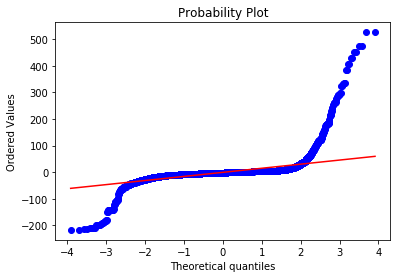

In [33]:
stats.probplot(df_lm['Residuals'], dist="norm", plot=pylab)

Text(0,0.5,'Predictions')

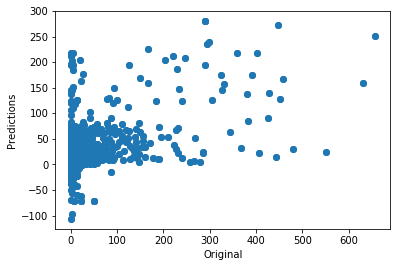

In [34]:
plt.scatter(x = df_lm['Original'], y = df_lm['Predictions'])
plt.xlabel('Original')
plt.ylabel('Predictions')

Text(0,0.5,'Length of Blog Post')

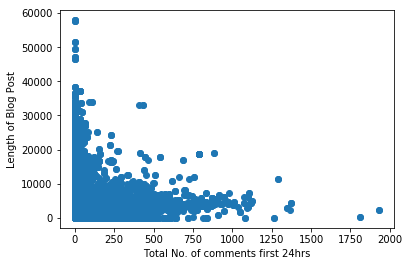

In [45]:
plt.scatter(x=X_train.iloc[:,53],y=X_train.iloc[:,61])
plt.xlabel("Total No. of comments first 24hrs")
plt.ylabel("Length of Blog Post")

In [36]:
we = pd.DataFrame(X_train.iloc[:, [263,264,265,266,267,268,269]])

In [37]:
we['original'] = y_train

In [38]:
we.head()

,263,264,265,266,267,268,269,original
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,28.0


In [39]:
#plt.hist(we.iloc[:,:-1],y=we.iloc[:,-1])

In [40]:
#Box - Cox
trainData = train_data[len(train_data.columns)-1]
y_lambda, l = boxcox(trainData)
print('lambda-value: ',l)


ValueError: Data must be positive.

In [ ]:
#new_model
regObject_new = linear_model.LinearRegression()
regObject_new.fit(train_data,y_lambda)

#predict
y_new_boxcox = regObject_new.predict(train_data)
residual_boxcox = y_lambda-y_new_boxcox
regObject_new.score(train_data,y_lambda)
plt.scatter(y_new_boxcox,residual_boxcox)

Text(0,0.5,'Target')

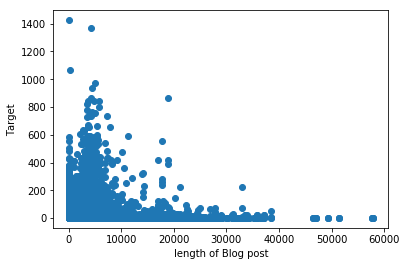

In [42]:
plt.scatter(x = X_train.iloc[:,61], y = y_train)
plt.xlabel('length of Blog post')
plt.ylabel('Target')